In [23]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
 #sklearn preproc

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

import pickle

In [24]:
data_index=pd.read_csv('../data/out_csv/index_France.csv')

In [25]:
data_index=data_index.set_index('date')

In [26]:
data_index.head(20)

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,
2020-02-15,0.026779,0.012400,0.0,12.0,1.0,1.0,1.0,0.023908,0.0,0.0,0.0,0.0
2020-02-16,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-17,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-18,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-19,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-20,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-21,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-22,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-23,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0


In [27]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.tail()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2022-09-07,0.0,0.0,0.0,33679416.0,20142.0,150902.0,46.0,0.05093,149538407.0,54554576.0,...,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0,150629.0,150575.0,150524.0,150414.0
2022-09-08,0.0,0.0,0.0,33699282.0,19866.0,150960.0,58.0,0.05093,149566662.0,54555124.0,...,150902.0,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0,150629.0,150575.0,150524.0
2022-09-09,0.0,0.0,0.0,33718369.0,19087.0,150991.0,31.0,0.05093,0.0,0.0,...,150960.0,150902.0,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0,150629.0,150575.0
2022-09-10,0.0,0.0,0.0,33718369.0,0.0,150991.0,0.0,0.05093,0.0,0.0,...,150991.0,150960.0,150902.0,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0,150629.0
2022-09-11,0.0,0.0,0.0,33718369.0,0.0,150991.0,0.0,0.05093,0.0,0.0,...,150991.0,150991.0,150960.0,150902.0,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0


In [28]:
data_index=data_index.fillna(0)

In [42]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [43]:
X_up=X.copy()

In [44]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [45]:
n = len(X)
X_train = X[0:int(n-15)]
X_test=X[int(n-15):]
y_train=y[0:int(n-15)]
y_test=y[int(n-15):]

In [46]:
country='France'

In [47]:
path='/home/sumedha/code/covid_time_series_prediction/covid_time_series_prediction/data/models'

In [48]:
model=pickle.load(open(f'{path}/model_{country}.pkl','rb'))

In [35]:
model

SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

In [36]:
X_test_columns=data_index.drop(columns=['total_deaths','new_cases','new_deaths'])
X_test_columns.columns

Index(['containment_and_health', 'stringency', 'economics_sup', 'total_cases',
       'gov_response', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'day-1', 'day-2', 'day-3',
       'day-4', 'day-5', 'day-6', 'day-7', 'day-8', 'day-9', 'day-10'],
      dtype='object')

In [195]:
def predict_output(X_test,y_test, metric = False,country='France',path=path):

    model=pickle.load(open(f'{path}/model_{country}.pkl','rb'))

    predictions = []

    X_test_i = pd.DataFrame([X_test.iloc[0,9:]])

    X_test_0 = pd.DataFrame([X_test.iloc[0,:]])

    y_i = model.predict(X_test_0)

    predictions.append(y_i[0])

    for i in range (1,len(X_test)):

        X_test_features = pd.DataFrame([X_test.iloc[i,:9]])

        X_test_i.iloc[0,1:] = X_test_i.iloc[0,:-1]
        X_test_i.iloc[0,0] = y_i[0]

        X_test_decal = pd.DataFrame(X_test_i)

        X_test_pred = pd.merge(left = X_test_features.reset_index(drop = True), right = X_test_decal.reset_index(drop = True),
                    left_index = True, right_index = True)

        y_i= model.predict(X_test_pred)


        predictions.append(y_i[0])

    if metric:
        mape_out = mape(y_test, predictions)
        return predictions, mape_out


    return predictions

In [200]:
predict_output(X_predict,y_predict, metric = False,country='France',path=path)

/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sume

ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [37]:
X_test_df=pd.DataFrame(X_test,columns=X_test_columns.columns)
X_predict=X_test_df.tail(10)
X_predict=X_predict.reset_index(drop=True)

In [38]:
y_predict=y_test.tail(10)
#X_predict=X_predict.reset_index(drop=True)

In [39]:
for i in range(1,10):
    X_predict.loc[i,'containment_and_health':'total_boosters']=X_predict.loc[0,'containment_and_health':'total_boosters']
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,0.998357,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998709,0.998152,0.998357,0.998741,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999106,0.998709,0.998357,0.998741,0.999045,0.999164,0.999449,0.999091,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999411,0.999106,0.998914,0.998741,0.999045,0.999443,0.999721,0.999449,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999795,0.999411,0.999311,0.999298,0.999045,0.999443,1.000000,0.999721,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.999795,0.999616,0.999695,0.999602,0.999443,1.000000,1.000000,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
min_num=min(y)
max_num=max(y)

In [184]:

list_pred=[]
list_pred_scale=[]
for k in range(0,9):
    y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[k]).T))
    y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
    list_pred.append(y_pred_)
    list_pred_scale.append(y_pred_scale)
    


/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sume

In [191]:
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[0]).T))
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))

/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [194]:
for j in range(1,9):
    X_predict.loc[j,f'day-{j}']=y_pred_scale
    y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[1]).T))
    y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
    print(y_pred_)
X_predict

[149109.]
[149109.]
[149109.]
[149109.]
[149109.]
[149109.]
[149109.]
[149109.]


/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sume

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.991749,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.991324,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,0.991324,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998709,0.998152,0.998357,0.991324,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999106,0.998709,0.998357,0.998741,0.991324,0.999164,0.999449,0.999091,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999411,0.999106,0.998914,0.998741,0.999045,0.991324,0.999721,0.999449,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999795,0.999411,0.999311,0.999298,0.999045,0.999443,0.991324,0.999721,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.999795,0.999616,0.999695,0.999602,0.999443,1.000000,0.991324,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
list_pred=[]

    
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[0]).T))
if y_pred_<y_train.tail(1):
    y_pred_=y_train.tail(1)
    y_pred_2=y_train.tail(1)
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(1,10):
    
    X_predict.loc[j,f'day-{j}']=y_pred_scale
    print(j)
    print(y_pred_scale)
    
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[1]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(2,10):
    X_predict.loc[j,f'day-{j-1}']=y_pred_scale
    print(j)
    print(y_pred_scale)

y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[2]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(3,10):
    X_predict.loc[j,f'day-{j-2}']=y_pred_scale
    print(y_pred_scale)
    print(j)
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[3]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(4,10):
    X_predict.loc[j,f'day-{j-3}']=y_pred_scale
    print(y_pred_scale)
    print(j)
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[4]).T))
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(5,10):
    X_predict.loc[j,f'day-{j-4}']=y_pred_scale
    print(y_pred_scale)
    print(j)
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[5]).T))
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(6,10):
    X_predict.loc[j,f'day-{j-5}']=y_pred_scale
    print(y_pred_scale)
    print(j)
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[6]).T))
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(7,10):
    X_predict.loc[j,f'day-{j-6}']=y_pred_scale
    print(y_pred_scale)
    print(j)
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[7]).T))
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num)) 
list_pred.append(y_pred_)
for j in range(8,1):
    X_predict.loc[j,f'day-{j-7}']=y_pred_scale
    print(y_pred_scale)
    print(j)

y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[8]).T))
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(9,10):
    X_predict.loc[j,f'day-{j-8}']=y_pred_scale
    print(y_pred_scale)
    print(j)

y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[8]).T))
list_pred.append(y_pred_)

  
    

X_predict   

1
[0.98795947]
2
[0.98795947]
3
[0.98795947]
4
[0.98795947]
5
[0.98795947]
6
[0.98795947]
7
[0.98795947]
8
[0.98795947]
9
[0.98795947]
2
[0.98709848]
3
[0.98709848]
4
[0.98709848]
5
[0.98709848]
6
[0.98709848]
7
[0.98709848]
8
[0.98709848]
9
[0.98709848]
[0.98612491]
3
[0.98612491]
4
[0.98612491]
5
[0.98612491]
6
[0.98612491]
7
[0.98612491]
8
[0.98612491]
9
[0.98501225]
4
[0.98501225]
5
[0.98501225]
6
[0.98501225]
7
[0.98501225]
8
[0.98501225]
9
[0.9837274]
5
[0.9837274]
6
[0.9837274]
7
[0.9837274]
8
[0.9837274]
9
[0.98229022]
6
[0.98229022]
7
[0.98229022]
8
[0.98229022]
9
[0.98068084]
7
[0.98068084]
8
[0.98068084]
9
[0.97914431]
9


/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sume

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.987959,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.987098,0.987959,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.986125,0.987098,0.987959,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.985012,0.986125,0.987098,0.987959,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.983727,0.985012,0.986125,0.987098,0.987959,0.999164,0.999449,0.999091,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.982290,0.983727,0.985012,0.986125,0.987098,0.987959,0.999721,0.999449,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.980681,0.982290,0.983727,0.985012,0.986125,0.987098,0.987959,0.999721,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.980681,0.982290,0.983727,0.985012,0.986125,0.987098,0.987959,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.979144,1.000000,0.980681,0.982290,0.983727,0.985012,0.986125,0.987098,0.987959,1.000000


In [178]:
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.991749,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.992055,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,0.992321,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998709,0.998152,0.998357,0.992560,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999106,0.998709,0.998357,0.998741,0.992820,0.999164,0.999449,0.999091,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999411,0.999106,0.998914,0.998741,0.999045,0.993126,0.999721,0.999449,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999795,0.999411,0.999311,0.999298,0.999045,0.999443,0.993458,0.999721,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.999795,0.999616,0.999695,0.999602,0.999443,1.000000,0.993764,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.007994,1.007994,1.007994,1.007994,1.007994,1.007994,1.007994,1.007994,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.017082,1.017082,1.017082,1.017082,1.017082,1.017082,1.017082,1.017082,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.025036,1.025036,1.025036,1.025036,1.025036,1.025036,1.025036,1.025036,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.031982,1.031982,1.031982,1.031982,1.031982,1.031982,1.031982,1.031982,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.038037,1.038037,1.038037,1.038037,1.038037,1.038037,1.038037,1.038037,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.043388,1.043388,1.043388,1.043388,1.043388,1.043388,1.043388,1.043388,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.048166,1.048166,1.048166,1.048166,1.048166,1.048166,1.048166,1.048166,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.052403,1.052403,1.052403,1.052403,1.052403,1.052403,1.052403,1.052403,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.056173,1.000000


In [147]:
pred_=pd.DataFrame(list_pred)
pred_

,0
0,149173.0
1,149219.0
2,149259.0
3,149295.0
4,149334.0
5,149380.0
6,149430.0
7,149476.0
8,149519.0


Text(0.5, 0, 'Date')

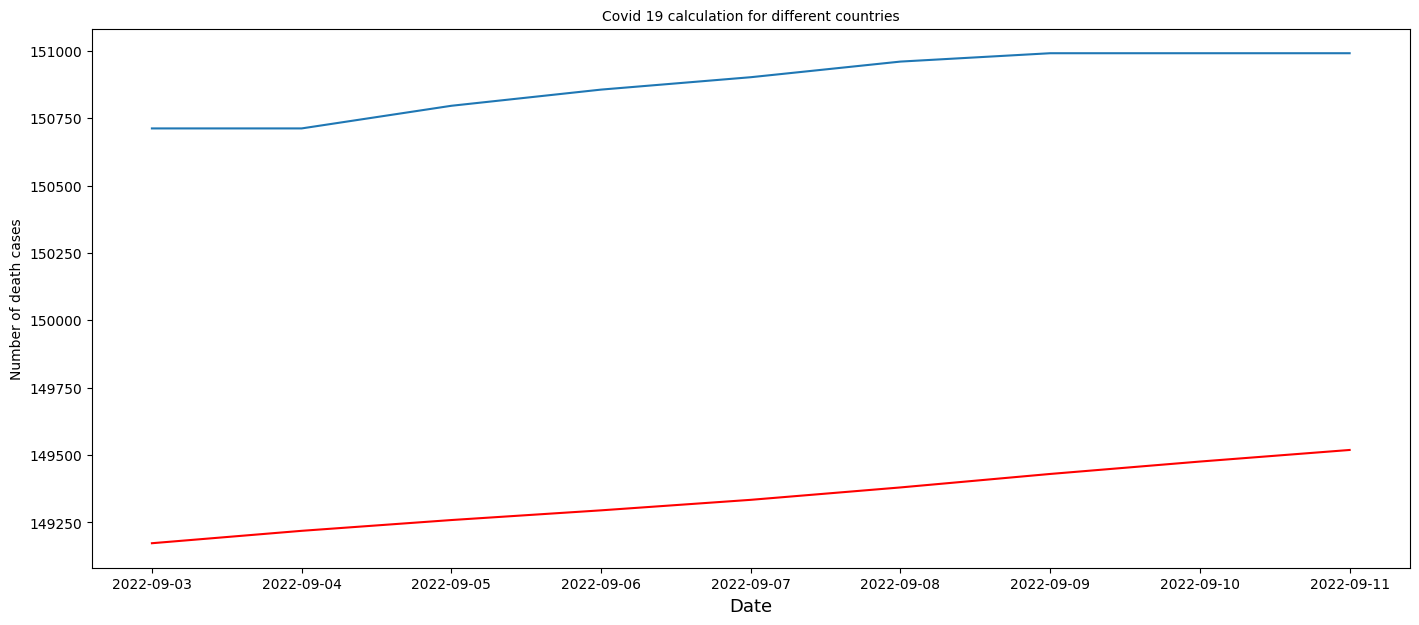

In [149]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[41:],pred_,color='r');
plt.plot(y_test.index[41:],y_test[41:]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

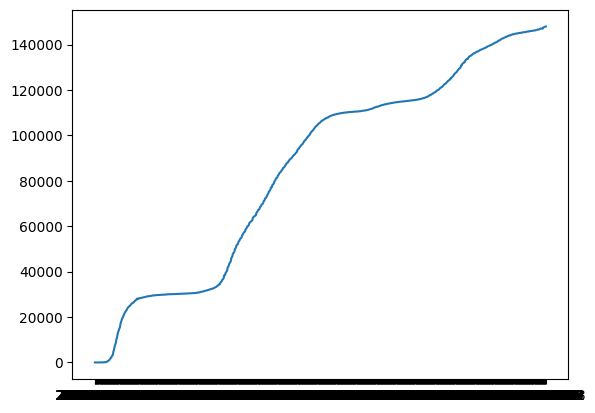

In [150]:
plt.plot(y_train)

In [152]:
y_train.tail(10)

date
2022-07-14    147067.0
2022-07-15    147067.0
2022-07-16    147067.0
2022-07-17    147067.0
2022-07-18    147482.0
2022-07-19    147619.0
2022-07-20    147744.0
2022-07-21    147877.0
2022-07-22    147990.0
2022-07-23    147990.0
Name: total_deaths, dtype: float64

In [155]:
pd.DataFrame(X_test).tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
40,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.997480,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
41,0.0,0.0,0.0,0.996502,0.151723,0.999288,0.999953,0.999941,0.997657,0.998152,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
42,0.0,0.0,0.0,0.996502,0.151723,0.999297,0.999955,0.999943,0.997685,0.998152,0.998152,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
43,0.0,0.0,0.0,0.997449,0.151723,0.999428,0.999966,0.999955,0.998113,0.998152,0.998152,0.998357,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
44,0.0,0.0,0.0,0.998247,0.151723,0.999676,0.999979,0.999972,0.998934,0.998709,0.998152,0.998357,0.998741,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
45,0.0,0.0,0.0,0.998845,0.151723,0.999811,0.999990,0.999986,0.999374,0.999106,0.998709,0.998357,0.998741,0.999045,0.999164,0.999449,0.999091,0.998753,0.998301
46,0.0,0.0,0.0,0.999434,0.151723,1.000000,1.000000,1.000000,1.000000,0.999411,0.999106,0.998914,0.998741,0.999045,0.999443,0.999721,0.999449,0.999091,0.999031
47,0.0,0.0,0.0,1.000000,0.151723,0.000000,0.000000,0.000000,0.000000,0.999795,0.999411,0.999311,0.999298,0.999045,0.999443,1.000000,0.999721,0.999449,0.999369
48,0.0,0.0,0.0,1.000000,0.151723,0.000000,0.000000,0.000000,0.000000,1.000000,0.999795,0.999616,0.999695,0.999602,0.999443,1.000000,1.000000,0.999721,0.999728
49,0.0,0.0,0.0,1.000000,0.151723,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
